# CS418 Data Pirates Final Report
1.Arsalan Babar 2.Imran Babar 3.Vraj Patel 4.Dilip Vemuri 5.Jason Yeoh

GitHub Repo for this notebook:
https://github.com/edgeslab/CS418-Project/blob/master/418_ProjectV3.ipynb

# DATA

## Data sets used: 

### Crimes in Chicago Since 2001:
Very large dataset. Required Cleaning. Only needed the data from the years 2008 to 2012. Fixed Structural Erros. Removed Unwanted Outliers. Wrote a python script for cleaning. <br>Python Script Filename(on github repo): datacleaning.py <br>Final Cleaned Data CSV Filename: DataFiltered.CSV

### Socioeconomic Data Set:
Not very large data set. Easy to utilize. Therefore, it did not require cleaning. Used the original csv file.<br>
Filename(on github repo): ChicagoSocioecon.csv

# ML/Stats
Use at least two machine learning or statistical analysis techniques to analyze your data, explain what you did, and talk about the inferences you uncovered.

## Machine Learning Analysis Using DECISION TREE REGRESSION
#### We are using the Chicago Socioeconomic Dataset to try and predict Per Capita Income (in US DOLLARS) in the Chiago Neighborhoods for each community area number based upon % of Housing Crowded, % Households below poverty, % aged 16+ unemployed, % Aged 25+ without highschool diploma,	% aged under 18 OR over 64. The two graphs below show the Visualization of the machine learning model built using Decision Tree Regression. It is pretty close to actual values, if you see closely. In short, this model is taking in to account all the socioeconmic factors and spitting out the values for per capita income which it believes should go with that specific neighborhood based on other socioeconomic data and then we can compare it to the actual values to see what the difference is and which neighborhoods have more than required per capita income or which neighborhoods are poorer than they should have been. This model is showing that some neigborhoods have more per capita income than what was expected and many have lower than what was expected. Thus, It is directly related to our hypothesis of economic polarization in Chicago.


### PREDICTED AND ACTUAL DATA FROM THE MODEL

In [2]:
import pandas as pd
from sklearn import linear_model
from  matplotlib import pyplot 
import numpy as np 
%matplotlib inline



Crimes= pd.read_csv('ChicagoSocioecon.csv') 
A = Crimes.drop('PER CAPITA INCOME ', axis=1)
A = Crimes.drop('COMMUNITY AREA NAME', axis=1)

X=A.drop(A.index[77])

B= Crimes['PER CAPITA INCOME ']
y= B.drop(B.index[77])




from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)  
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df.index+=1
df

,Actual,Predicted
49,17949,18672.0
75,27149,27751.0
60,22694,24336.0
55,22677,23472.0
35,23791,23472.0
27,12961,13231.0
69,17285,18672.0
34,16148,16444.0
46,16579,16444.0
70,23482,24336.0


### Model Statistics

In [7]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1724.25
Mean Squared Error: 19006180.25
Root Mean Squared Error: 4359.607809195685


### DECISION TREE REGRESSION VISUALIZATION

Text(0, 0.5, 'Per Capita Income')

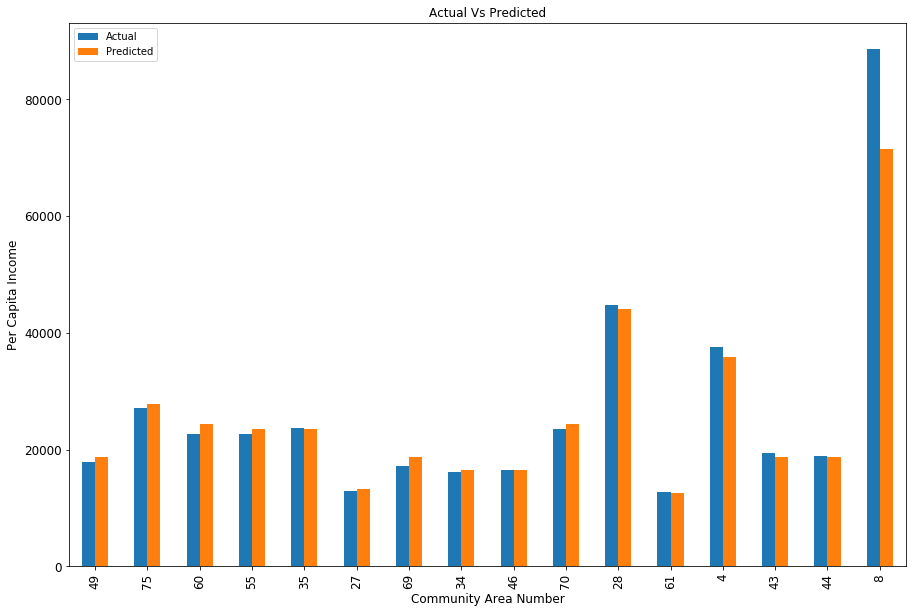

In [8]:
ax = df[['Actual','Predicted']].plot(kind='bar', title ="Actual Vs Predicted", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Community Area Number", fontsize=12)
ax.set_ylabel("Per Capita Income", fontsize=12)


# Visualization: 
Provide at least two distinct visualizations of your data or final results. This means two different techniques. If you use bar charts to analyze one aspect of your data, while you may use bar charts again, the second use will not count as a distinct visualization.

# Additional work
In addition to the requirements in the ML and visualization sections above, we would like to see at least one extra from either category. That means a total of five deliverables.


# Results
Fully explain and analyze the results from your data, i.e. the inferences or correlations you uncovered, the tools you built, or the visualizations you created.
